In [1]:
import pandas as pd

In [2]:
fifa2019 = pd.read_csv('fifa2019.csv')

In [3]:
df = pd.DataFrame.copy(fifa2019.sort_values(by = 'Overall', ascending = False).head(200))

In [4]:
test_features = ['Name', 'Stamina', 'Dribbling', 'ShortPassing', 'Penalties']

In [5]:
test_df = pd.DataFrame(df, columns = test_features)

In [6]:
# 체력(Stamina) & 드리블(Dribbling)
import numpy as np
XY = np.array(test_df)
X = XY[:, 1:3]

In [7]:
k = 3  # 분류하려는 군집의 개수가 3개이므로 k = 3

In [8]:
C_x = np.random.choice(X[:,0], k)

In [9]:
C_y = np.random.choice(X[:,1], k)

In [10]:
C = np.array(list(zip(C_x, C_y)))

In [11]:
# 유클리디안 거리 계산 함수 만들기
def Distance(A,B):
    return np.sqrt(np.sum(np.power((A-B), 2)))

In [12]:
C_old = np.zeros(C.shape)  # 중심의 좌표를 업데이트하기 위해 동일한 크기의 행렬을 선언한다.

In [13]:
clusters = np.zeros(len(X))  # 모든 데이터의 클러스터 레이블을 저장하기 위해 행렬을 선언한다. 

In [14]:
flag = Distance(C, C_old)  # 중심좌표간의 거리 계산

In [15]:
from copy import deepcopy

In [16]:
distances = []

In [17]:
while flag != 0:
    for i in range(len(X)):
        for j in range(3):
            temp = Distance(X[i], C[j])
            distances.append(temp)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        distances = []
        
    C_old = deepcopy(C)
    
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points)
        
    flag = Distance(C, C_old)

In [18]:
import matplotlib.pyplot as plt

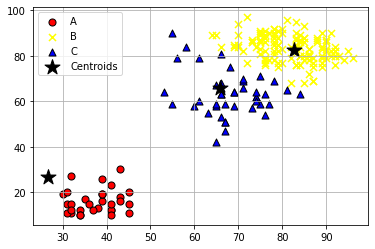

In [19]:
# 1번 군집
plt.scatter(X[clusters == 0, 0], X[clusters == 0, 1], s = 50, c = 'red', marker = 'o', edgecolor = 'black', label = 'A')

# 2번 군집
plt.scatter(X[clusters == 1, 0], X[clusters == 1, 1], s = 50, c = 'yellow', marker = 'x', edgecolor = 'black', label = 'B')

# 3번 군집
plt.scatter(X[clusters == 2, 0], X[clusters == 2, 1], s = 50, c = 'blue', marker = '^', edgecolor = 'black', label = 'C')

# 군집의 중심 좌표들
plt.scatter(C[:,0], C[:,1], s = 250, marker = '*', c = 'black', edgecolor = 'black', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()